<a href="https://colab.research.google.com/github/M-Sethupathy/Shala2020/blob/master/ML-Assignment-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

In [42]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1028 non-null   int64 
 1   Attrition                 1028 non-null   int64 
 2   BusinessTravel            1028 non-null   object
 3   DailyRate                 1028 non-null   int64 
 4   Department                1028 non-null   object
 5   DistanceFromHome          1028 non-null   int64 
 6   Education                 1028 non-null   int64 
 7   EducationField            1028 non-null   object
 8   EmployeeCount             1028 non-null   int64 
 9   EmployeeNumber            1028 non-null   int64 
 10  EnvironmentSatisfaction   1028 non-null   int64 
 11  Gender                    1028 non-null   object
 12  HourlyRate                1028 non-null   int64 
 13  JobInvolvement            1028 non-null   int64 
 14  JobLevel                

In [43]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [44]:
attrition_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.0,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,36.999027,0.167315,806.551556,9.010700,2.873541,1.0,710.198444,2.719844,65.451362,2.731518,2.093385,2.757782,6632.573930,14243.531128,2.697471,15.172179,3.152724,2.732490,0.758755,11.417315,2.769455,2.763619,7.100195,4.263619,2.210117,4.141051,513.500000
std,9.444297,0.373439,407.043735,8.078418,1.032840,0.0,418.513656,1.089614,20.274229,0.703240,1.141854,1.105306,4855.747841,7048.768076,2.527534,3.647641,0.359896,1.088774,0.836236,8.015441,1.302518,0.703005,6.316289,3.630387,3.288559,3.608460,296.902341
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.750000,2.000000,2.000000,1.0,351.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2886.000000,8259.750000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,256.750000
50%,36.000000,0.000000,813.000000,7.000000,3.000000,1.0,701.500000,3.000000,65.000000,3.000000,2.000000,3.000000,4907.500000,14074.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,513.500000
75%,43.000000,0.000000,1157.250000,13.000000,4.000000,1.0,1069.250000,4.000000,83.000000,3.000000,3.000000,4.000000,8729.500000,20342.250000,4.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,770.250000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1447.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1027.000000


In [45]:
print(attrition_data.isna().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

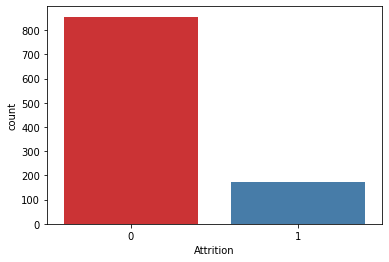

In [46]:
sns.countplot(attrition_data['Attrition'], palette='Set1')
plt.show()

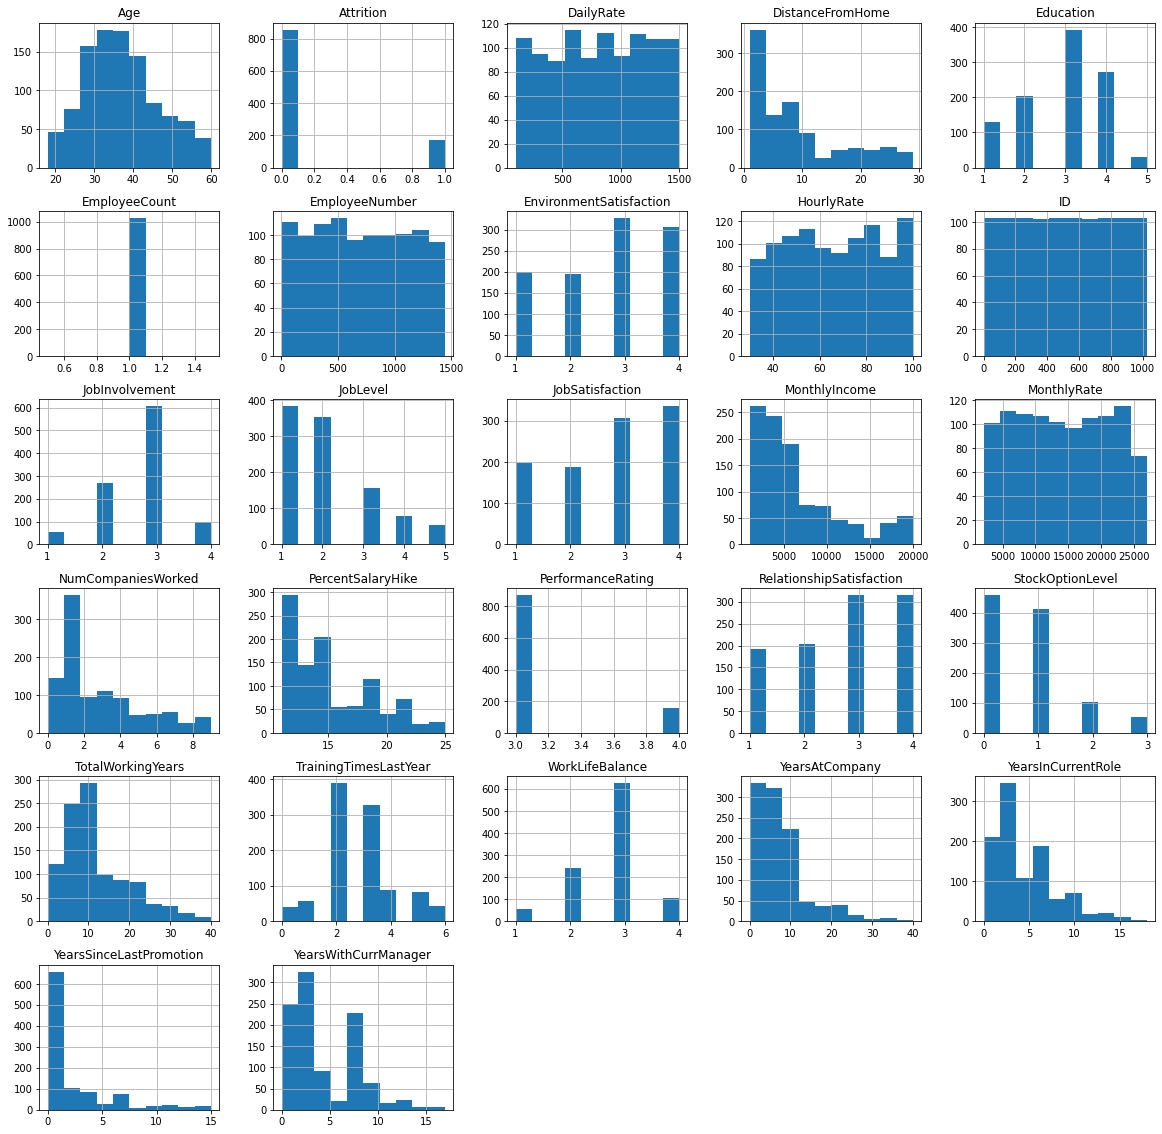

In [47]:
_ = attrition_data.hist(figsize=(20,20))


In [48]:
attrition_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.0,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,36.999027,0.167315,806.551556,9.010700,2.873541,1.0,710.198444,2.719844,65.451362,2.731518,2.093385,2.757782,6632.573930,14243.531128,2.697471,15.172179,3.152724,2.732490,0.758755,11.417315,2.769455,2.763619,7.100195,4.263619,2.210117,4.141051,513.500000
std,9.444297,0.373439,407.043735,8.078418,1.032840,0.0,418.513656,1.089614,20.274229,0.703240,1.141854,1.105306,4855.747841,7048.768076,2.527534,3.647641,0.359896,1.088774,0.836236,8.015441,1.302518,0.703005,6.316289,3.630387,3.288559,3.608460,296.902341
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.750000,2.000000,2.000000,1.0,351.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2886.000000,8259.750000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,256.750000
50%,36.000000,0.000000,813.000000,7.000000,3.000000,1.0,701.500000,3.000000,65.000000,3.000000,2.000000,3.000000,4907.500000,14074.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,513.500000
75%,43.000000,0.000000,1157.250000,13.000000,4.000000,1.0,1069.250000,4.000000,83.000000,3.000000,3.000000,4.000000,8729.500000,20342.250000,4.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,770.250000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1447.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1027.000000


## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  

In [0]:
y = attrition_data['Attrition']
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# x = attrition_data.drop(columns='Attrition').select_dtypes(include=numerics)

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
text_columns = attrition_data.select_dtypes(include='object')

for tc in text_columns.columns :
  attrition_data[tc] = le.fit_transform(attrition_data[tc])
x = attrition_data.drop(columns=['Attrition','EmployeeCount','EmployeeNumber','ID'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

In [50]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,56,2,1255,1,1,2,1,1,0,90,3,1,6,1,1,2066,10494,2,0,22,4,4,1,5,3,4,3,2,1,0
1024,47,2,359,1,2,4,3,1,0,82,3,4,5,3,1,17169,26703,3,0,19,3,2,2,26,2,4,20,17,5,6
1025,24,2,1476,2,4,1,3,4,0,42,3,2,7,3,1,4162,15211,1,1,12,3,3,2,5,3,3,5,4,0,3
1026,32,2,601,2,7,5,2,4,1,97,3,2,7,4,1,9204,23343,4,0,12,3,3,1,7,3,2,4,3,0,3


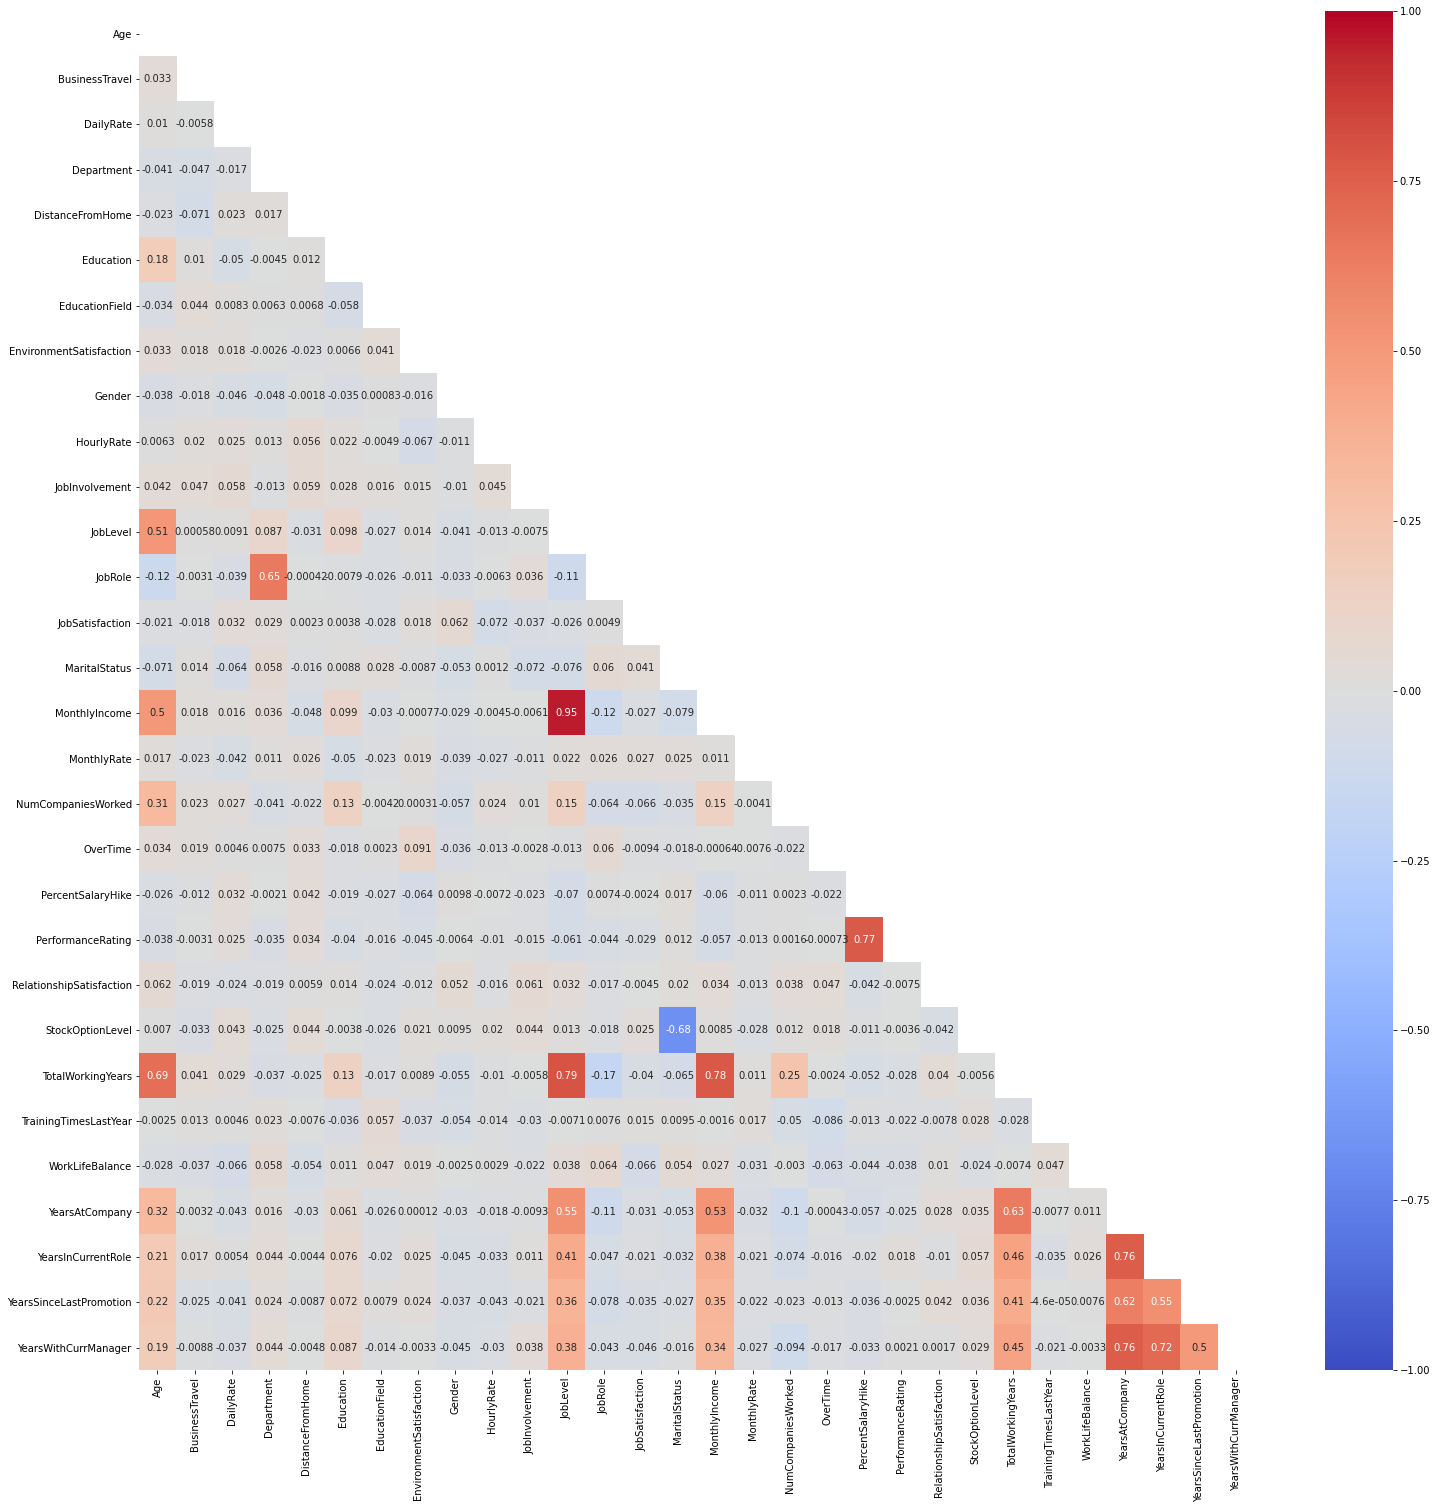

In [51]:
# Visualizing the correlation matrix 
plt.figure(figsize=(25,25))
mask = np.zeros_like(x.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(x.corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            mask=mask)
# plt.savefig('corr-matrix.png')
plt.show()

------------------------------------------------------------------------------------
Used Classifier is " DecisionTreeClassifier "
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       177
           1       0.28      0.34      0.31        29

    accuracy                           0.78       206
   macro avg       0.58      0.60      0.59       206
weighted avg       0.80      0.78      0.79       206

Accuracy is  78.16 %


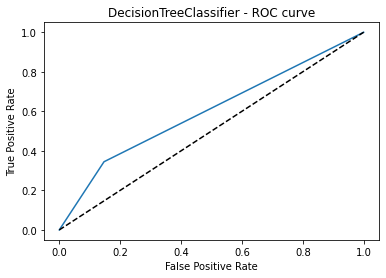

------------------------------------------------------------------------------------
Used Classifier is " RandomForestClassifier "
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       177
           1       0.64      0.24      0.35        29

    accuracy                           0.87       206
   macro avg       0.76      0.61      0.64       206
weighted avg       0.85      0.87      0.85       206

Accuracy is  87.38 %


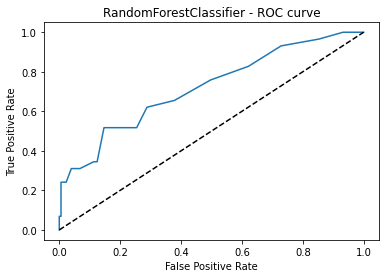

------------------------------------------------------------------------------------
Used Classifier is " ExtraTreesClassifier "
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       177
           1       0.80      0.14      0.24        29

    accuracy                           0.87       206
   macro avg       0.84      0.57      0.58       206
weighted avg       0.86      0.87      0.83       206

Accuracy is  87.38 %


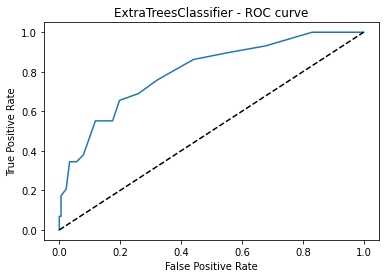

------------------------------------------------------------------------------------
Used Classifier is " AdaBoostClassifier "
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       177
           1       0.29      0.24      0.26        29

    accuracy                           0.81       206
   macro avg       0.59      0.57      0.58       206
weighted avg       0.80      0.81      0.80       206

Accuracy is  81.07 %


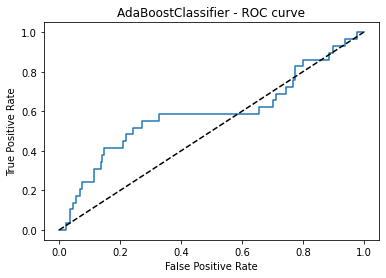

Max Accuracy is " 87.38 " By the Classifier named " RandomForestClassifier "


In [52]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,classification_report,accuracy_score



no_estimators = 30
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=no_estimators),
          ExtraTreesClassifier(n_estimators=no_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=no_estimators)
          ]
max_accuracy = 0
max_accuracy_classifier = None
for model in models:
  cf_name = model.__class__.__name__
  print('------------------------------------------------------------------------------------\nUsed Classifier is "',cf_name,'"')
  _ = model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_test,y_pred.round()))
  current_accuracy = accuracy_score(y_test,y_pred.round())
  if max_accuracy < current_accuracy :
    max_accuracy = current_accuracy
    max_accuracy_classifier = model
  print('Accuracy is ',np.round(current_accuracy*100, 2), '%')

  probs = model.predict_proba(X_test)  
  probs = probs[:, 1]  
  fper, tper, thresholds = roc_curve(y_test, probs) 
  _ = plt.plot(fper, tper)
  _ = plt.plot([0,1], [0,1], 'k--')
  _ = plt.xlabel('False Positive Rate')
  _ = plt.ylabel('True Positive Rate')
  _ = plt.title(cf_name + ' - ROC curve')
  # show the plot
  plt.show()

print('Max Accuracy is "',np.round(max_accuracy*100, 2),'" By the Classifier named "',max_accuracy_classifier.__class__.__name__,'"')